/var/folders/3y/81tkh9q91_bg2126ywrxppk80000gn/T/ipykernel_87012/2067242350.py:23: DtypeWarning: Columns (11,17,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  AST = pd.read_csv(os.path.join(homedirec,'Archive','Asteroid.csv'))


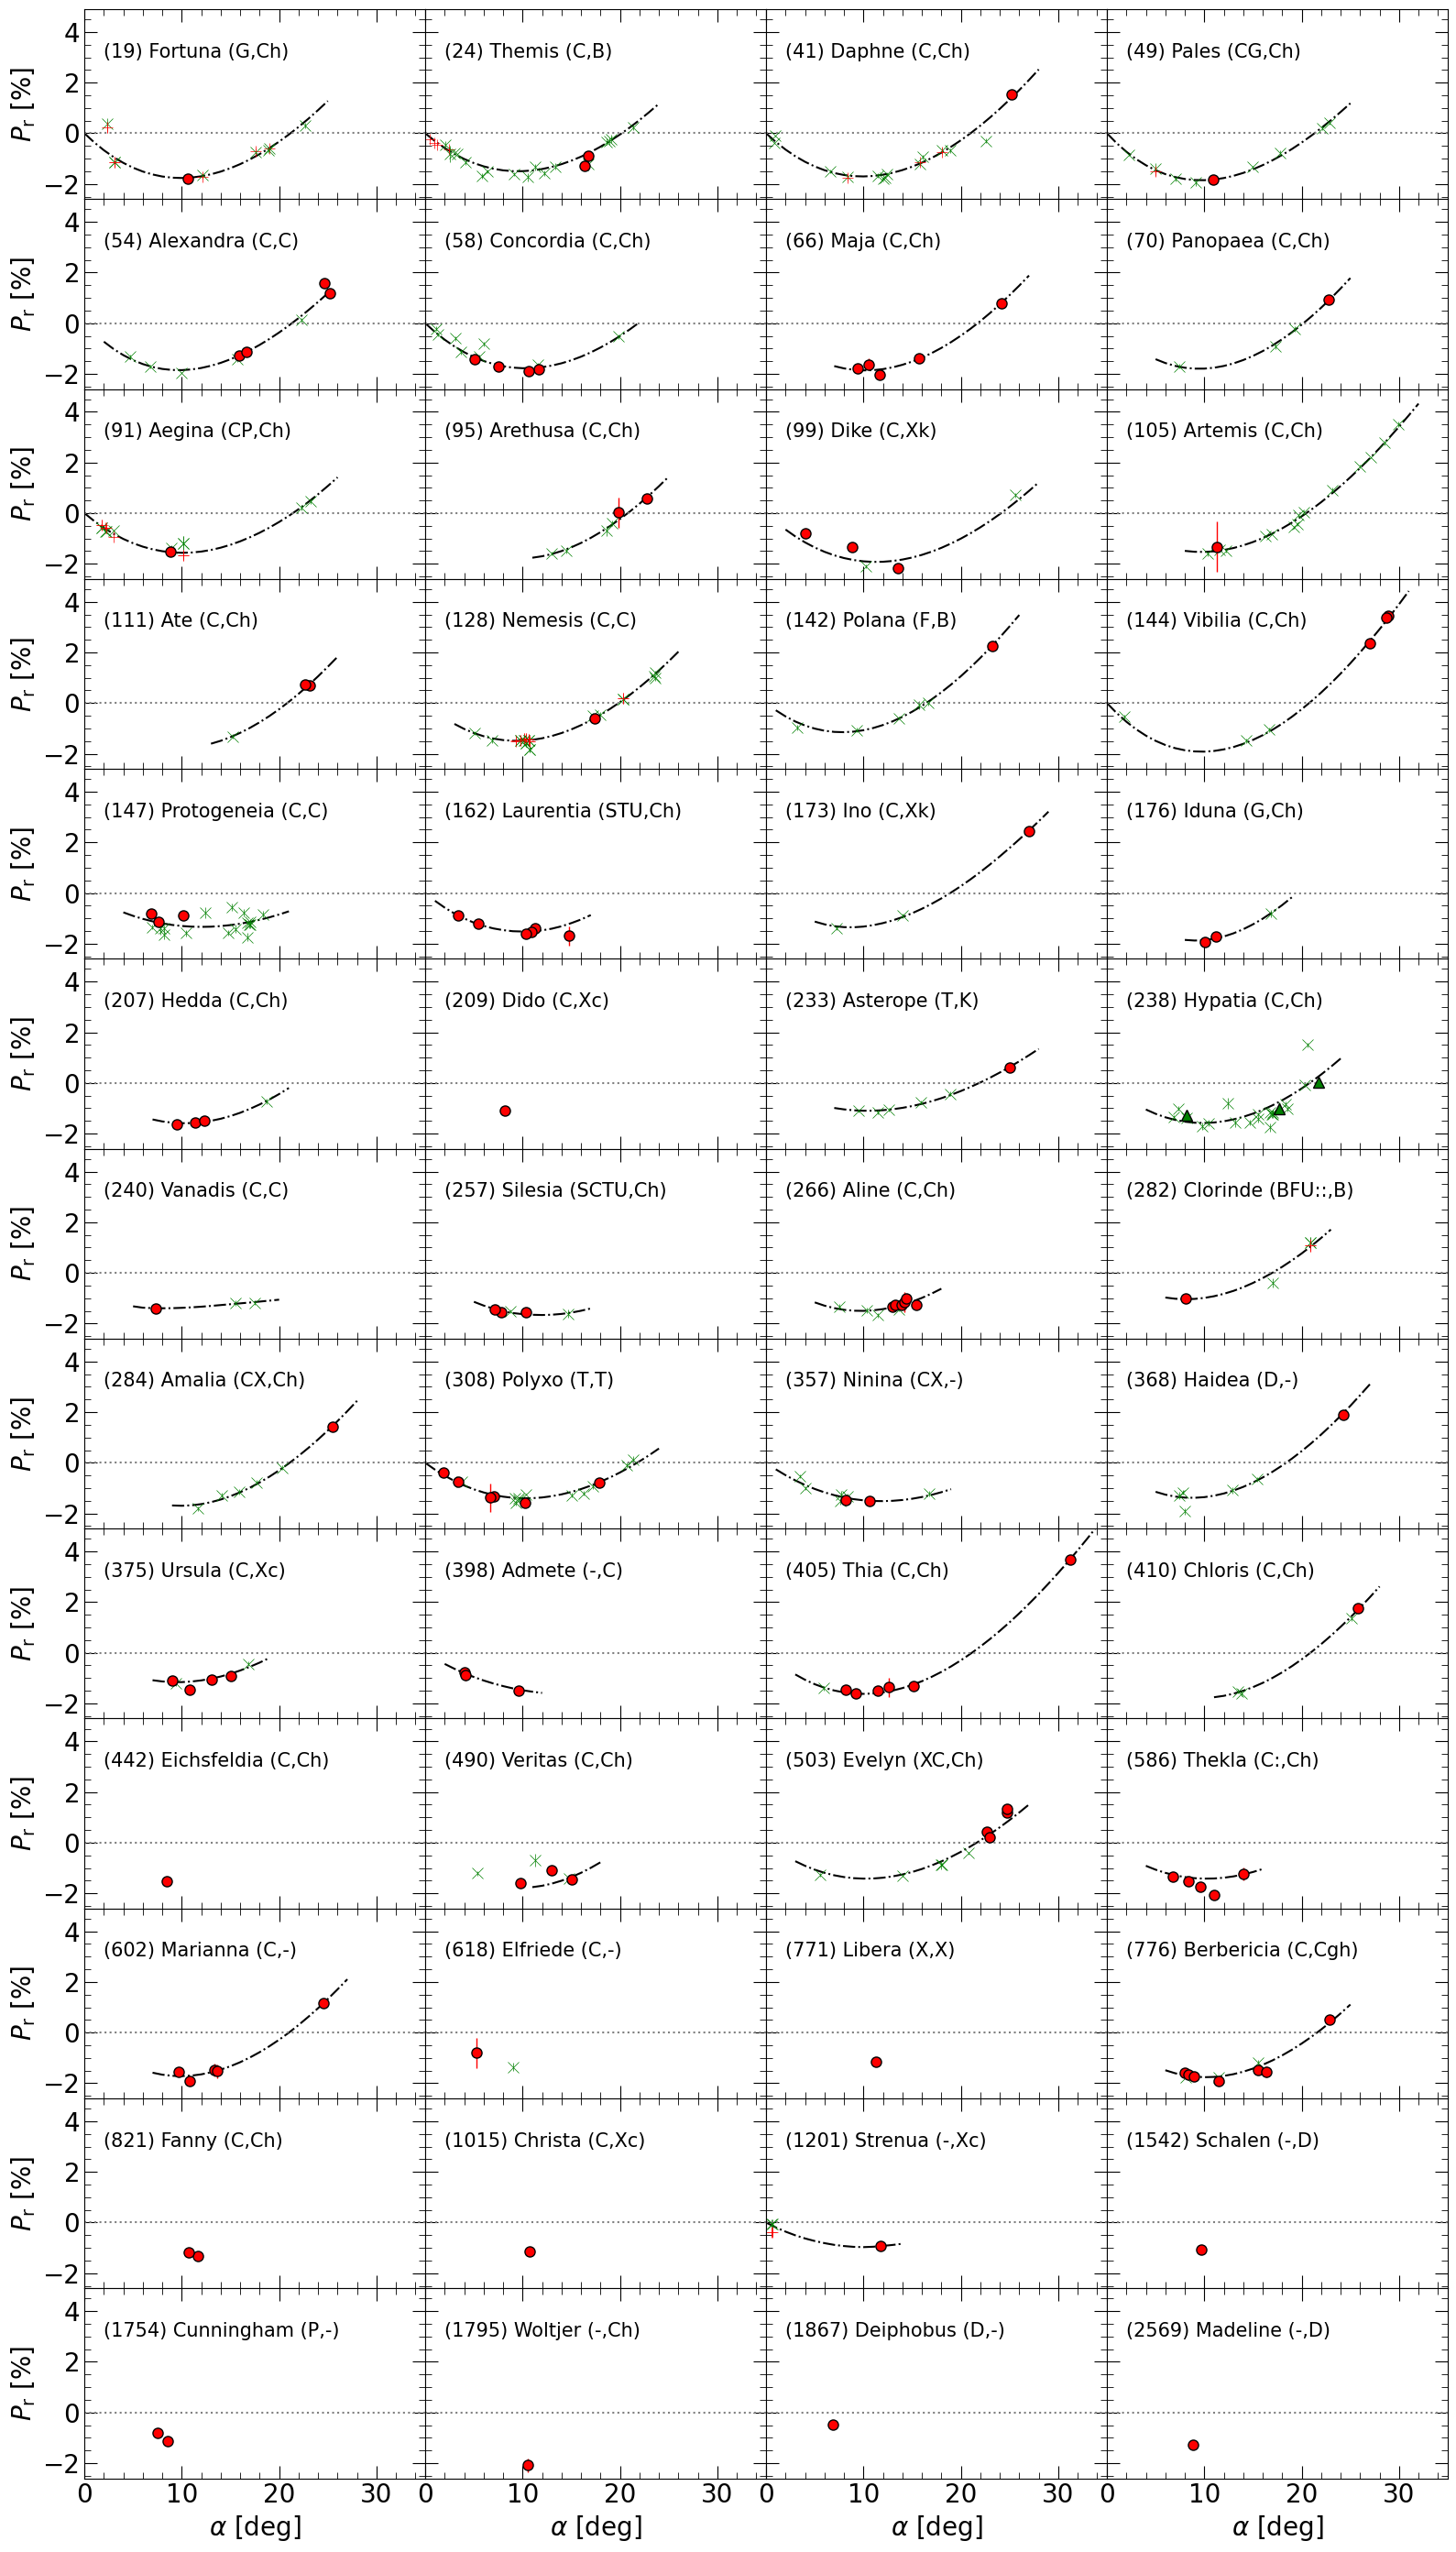

In [2]:
import os 
import glob 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from astroquery.jplsbdb import SBDB
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.cm as cm


def exponential(x,a,b,c):
    eq = a*np.exp(-x/b) -a + c*x
    return eq 

homedirec = os.path.join(Path.home(),'Dropbox','Research')
subpath = os.path.join(homedirec,'Hydrated_asteroid/Manuscript/data')
file_list = pd.read_csv(os.path.join(subpath,'obs_result.csv'))
# AST = pd.read_csv(os.path.join(homedirec,'Archive','Asteroid.csv'))


TARGET = list(sorted(set(file_list['ID'].values)))    
total_num = len(TARGET)
numnum = 9+4
fig,ax = plt.subplots(numnum,4,figsize=(16,2.15*numnum),sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0})

mfc_vr = dict({'Rc':'r','V':'g','R':'r'})
marker_our = dict({'Rc':'o','V':'^'})
marker_ref = dict({'Rc':'+','V':'x','R':'+'})
for num,ID in enumerate(TARGET[:numnum*4]):
    row = num//4
    col = num%4
    our_data = file_list[file_list['ID']==ID]
    ast = AST[AST['id']=='a{0:07d}'.format(ID)]
    full_name = ast['full_name'].values[0]
    full_name = full_name.split('(')[0]
    full_name = full_name[0:4].replace(' ','')+full_name[4:]
    full_name = full_name[0:5]+ full_name[5:].replace(' ','')
    fil = our_data['Filter'].values[0]
    
    ast = AST[AST['id']=='a{0:07d}'.format(ID)]
    spec_B = str(ast['spec_B'].values[0]).replace('nan',' ')
    spec_T = str(ast['spec_T'].values[0]).replace('nan',' ')
    
    ax[row,col].errorbar(our_data['alpha'],our_data['Pr'],yerr=our_data['eP'],
                        ls='',mec='k',mfc=mfc_vr[fil],ms=8,marker=marker_our[fil],
                        ecolor=mfc_vr[fil],elinewidth=1,
                        zorder=10)
    
    alpha = list(our_data['alpha'].values)
    Pr = list(our_data['Pr'].values)
    ePr = list(our_data['eP'].values)
    
    ref = pd.read_csv(os.path.join(homedirec,'Archive/Polarimetry_Ast_2/data/a{0:06d}.csv'.format(ID)))
    ref = ref.drop_duplicates(subset=['alpha','Pr','ePr'])
    
    ban_band = ['G','U','B','I']
    ref = ref[~ref['Filter'].isin(ban_band)]
    ref = ref.drop_duplicates()
    
    
    MSI = ref[ref['ref']=='MSI']
    WFGS = ref[ref['ref']=='WFGS']
    ref = ref[ref['ref']!='WFGS']
    ref = ref[ref['ref']!='MSI']
    ref = ref[ref['ref']!='WFGS2']
    for r in range(len(ref)):
        fil = ref['Filter'].values[r]
        fil = fil.replace(' ','')
        ax[row,col].errorbar(ref['alpha'].values[r],ref['Pr'].values[r],
                             yerr=ref['ePr'].values[r],
                            ls='',mec=mfc_vr[fil],mfc='none',ms=8,marker=marker_ref[fil],
                            ecolor=mfc_vr[fil],elinewidth=0.5,markeredgewidth=0.5,
                            zorder=2)
        alpha.append(ref['alpha'].values[r])
        Pr.append(ref['Pr'].values[r])
        ePr.append(ref['ePr'].values[r])

    if str(spec_T)==' ':
        spec_T = '-'
    if str(spec_B)==' ':
        spec_B = '-'
        
    ax[row,col].text(2,3, '({0} ({1},{2})'.format(full_name.replace(' ',') '),spec_T,spec_B), color='k',size=15)
    ax[row,col].set_xlim(0,35)
    ax[row,col].set_ylim(-2.6,4.9)
    ax[row,col].axhline(0,ls=':',color='gray')
    ax[row,col].xaxis.set_major_locator(MultipleLocator(10))
    ax[row,col].xaxis.set_minor_locator(MultipleLocator(2))
    ax[row,col].yaxis.set_major_locator(MultipleLocator(2))        
    ax[row,col].yaxis.set_minor_locator(MultipleLocator(0.5))
    ax[row,col].tick_params(axis = 'both', which='minor', length=5)
    ax[row,col].tick_params(axis ='both',which='both', direction='in')
    ax[row,col].tick_params(axis ='both',which='major', length=10)
    ax[row,col].tick_params(axis = 'both')
    ax[row,col].tick_params(axis='both',labelsize=20)
    ax[row,col].yaxis.set_ticks_position('both')
    ax[row,col].xaxis.set_ticks_position('both')
 
    ## Fitting
    if len(alpha)<3:
        continue
    if os.path.isfile(full_name+'.csv') and ID!=54:
        Pr_exp = pd.read_csv(full_name+'.csv')
    else:
        pass

    Pr_exp = Pr_exp[Pr_exp['alpha']>min(alpha)-3]    
    Pr_exp = Pr_exp[Pr_exp['alpha']<max(alpha)+3]    
    ax[row,col].plot(Pr_exp['alpha'],Pr_exp['med'],ls='-.', color='k',zorder=1)
        
for i in [0,1,2,3]:    
    ax[numnum-1,i].set_xlabel(r'$\alpha$ [deg]', fontsize=20)
    
for i in np.arange(0,numnum):    
    ax[i,0].set_ylabel(r'$P_\mathrm{r}$ [%]', fontsize=20)  
plt.tight_layout()
plt.savefig('fig1.pdf') 


442 Eichsfeldia
490 Veritas
503 Evelyn
586 Thekla
602 Marianna
618 Elfriede
771 Libera
776 Berbericia
821 Fanny
1015 Christa
1201 Strenua
1542 Schalen
1754 Cunningham
1795 Woltjer
1867 Deiphobus
2569 Madeline


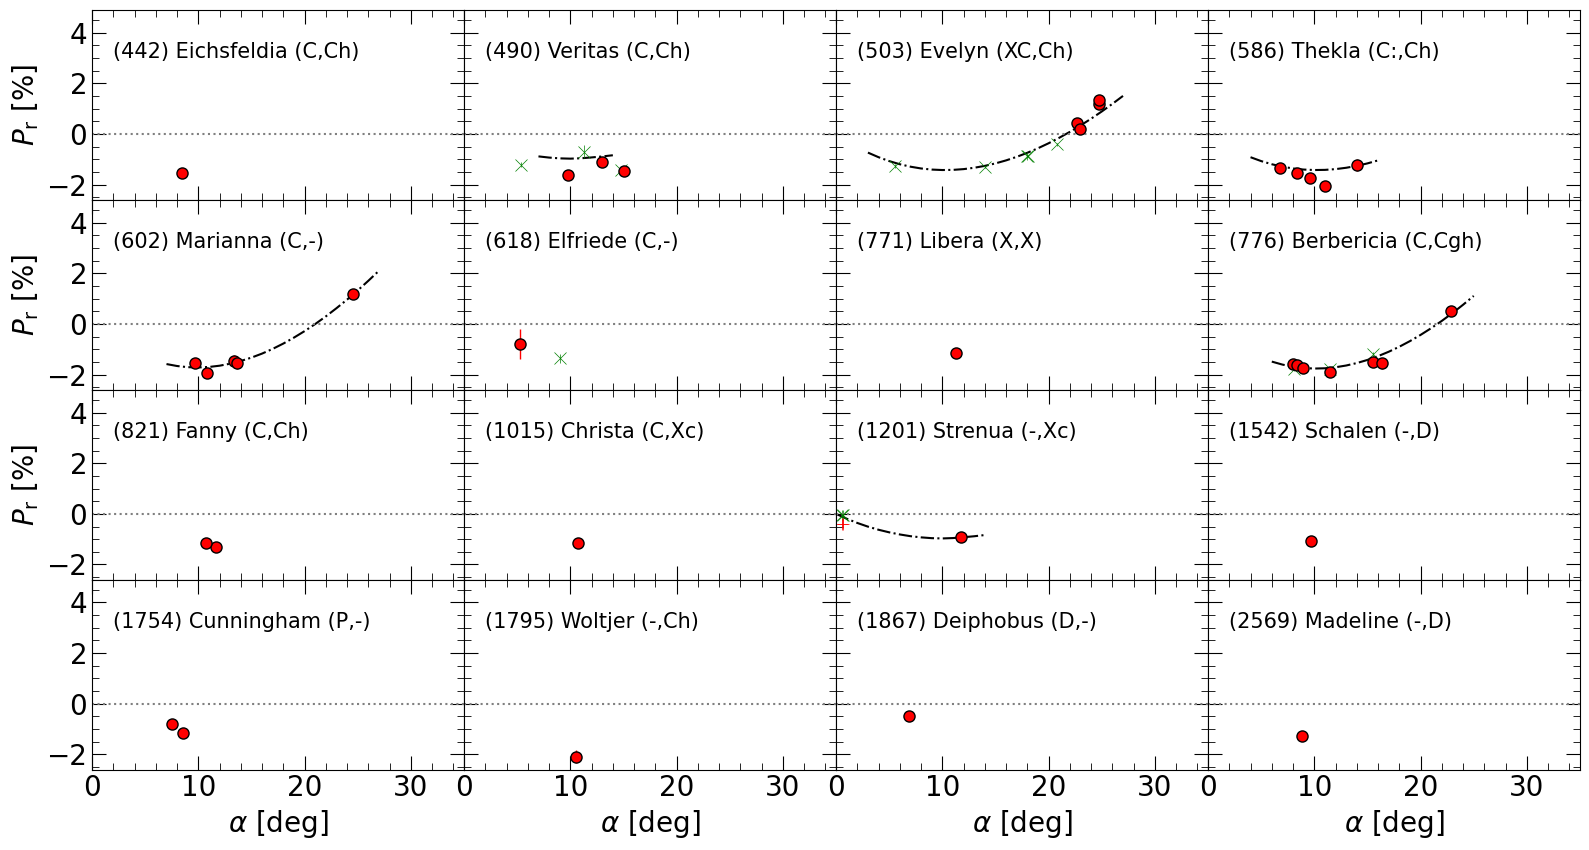

In [28]:
import os 
import glob 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from astroquery.jplsbdb import SBDB
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.cm as cm


def exponential(x,a,b,c):
    eq = a*np.exp(-x/b) -a + c*x
    return eq 

homedirec = os.path.join(Path.home(),'Dropbox','Research')
subpath = os.path.join(homedirec,'Hydrated_asteroid/Manuscript/data')
file_list = pd.read_csv(os.path.join(subpath,'obs_result.csv'))
# AST = pd.read_csv(os.path.join(homedirec,'Archive','Asteroid.csv'))


TARGET = list(sorted(set(file_list['ID'].values)))    

row_ = int(np.ceil(total_num/4- numnum))

fig,ax = plt.subplots(row_,4,figsize=(16,2.15*row_),sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0})


for num,ID in enumerate(TARGET[numnum*4:]):
    row = num//4
    col = num%4
    our_data = file_list[file_list['ID']==ID]
    ast = AST[AST['id']=='a{0:07d}'.format(ID)]
    full_name = ast['full_name'].values[0]
    full_name = full_name.split('(')[0]
    full_name = full_name[0:4].replace(' ','')+full_name[4:]
    full_name = full_name[0:5]+ full_name[5:].replace(' ','')
    print(full_name)
    fil = our_data['Filter'].values[0]
    
    ast = AST[AST['id']=='a{0:07d}'.format(ID)]
    spec_B = str(ast['spec_B'].values[0]).replace('nan',' ')
    spec_T = str(ast['spec_T'].values[0]).replace('nan',' ')
    
    ax[row,col].errorbar(our_data['alpha'],our_data['Pr'],yerr=our_data['eP'],
                        ls='',mec='k',mfc=mfc_vr[fil],ms=8,marker=marker_our[fil],
                        ecolor=mfc_vr[fil],elinewidth=1,
                        zorder=10)
    
    alpha = list(our_data['alpha'].values)
    Pr = list(our_data['Pr'].values)
    ePr = list(our_data['eP'].values)
    
    ref = pd.read_csv(os.path.join(homedirec,'Archive/Polarimetry_Ast_2/data/a{0:06d}.csv'.format(ID)))
    ref = ref.drop_duplicates(subset=['alpha','Pr','ePr'])
    
    ban_band = ['G','U','B','I']
    ref = ref[~ref['Filter'].isin(ban_band)]
    ref = ref.drop_duplicates()
    
    
    MSI = ref[ref['ref']=='MSI']
    WFGS = ref[ref['ref']=='WFGS']
    ref = ref[ref['ref']!='WFGS']
    ref = ref[ref['ref']!='MSI']
    ref = ref[ref['ref']!='WFGS2']

    for r in range(len(ref)):
        fil = ref['Filter'].values[r]
        fil = fil.replace(' ','')
        ax[row,col].errorbar(ref['alpha'].values[r],ref['Pr'].values[r],
                             yerr=ref['ePr'].values[r],
                            ls='',mec=mfc_vr[fil],mfc='none',ms=8,marker=marker_ref[fil],
                            ecolor=mfc_vr[fil],elinewidth=0.5,markeredgewidth=0.5,
                            zorder=2)
        alpha.append(ref['alpha'].values[r])
        Pr.append(ref['Pr'].values[r])
        ePr.append(ref['ePr'].values[r])
    if str(spec_T)==' ':
        spec_T = '-'
    if str(spec_B)==' ':
        spec_B = '-'
        
    ax[row,col].text(2,3, '({0} ({1},{2})'.format(full_name.replace(' ',') '),spec_T,spec_B), color='k',size=15)
    ax[row,col].set_xlim(0,35)
    ax[row,col].set_ylim(-2.6,4.9)
    ax[row,col].axhline(0,ls=':',color='gray')
    ax[row,col].xaxis.set_major_locator(MultipleLocator(10))
    ax[row,col].xaxis.set_minor_locator(MultipleLocator(2))
    ax[row,col].yaxis.set_major_locator(MultipleLocator(2))        
    ax[row,col].yaxis.set_minor_locator(MultipleLocator(0.5))
    ax[row,col].tick_params(axis = 'both', which='minor', length=5)
    ax[row,col].tick_params(axis ='both',which='both', direction='in')
    ax[row,col].tick_params(axis ='both',which='major', length=10)
    ax[row,col].tick_params(axis = 'both')
    ax[row,col].tick_params(axis='both',labelsize=20)
    ax[row,col].yaxis.set_ticks_position('both')
    ax[row,col].xaxis.set_ticks_position('both')
 
    ## Fitting
    if len(alpha)<3:
        continue
    if os.path.isfile(full_name+'.csv'):
        Pr_exp = pd.read_csv(full_name+'.csv')
    else:
        pass

    Pr_exp = Pr_exp[Pr_exp['alpha']>min(alpha)-3]    
    Pr_exp = Pr_exp[Pr_exp['alpha']<max(alpha)+3]    
    ax[row,col].plot(Pr_exp['alpha'],Pr_exp['med'],ls='-.', color='k',zorder=1)
        
for i in [0,1,2,3]:    
    ax[row_-1,i].set_xlabel(r'$\alpha$ [deg]', fontsize=20)
    
for i in np.arange(0,3):    
    ax[i,0].set_ylabel(r'$P_\mathrm{r}$ [%]', fontsize=20)  
plt.tight_layout()
plt.savefig('fig1.1.pdf') 


In [3]:
import os 
import glob 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pymc3 as pm
from astroquery.jplsbdb import SBDB
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.cm as cm

import pymc3 as pm
import theano
import corner

def exponential(x,a,b,c):
    eq = a*np.exp(-x/b) -a + c*x
    return eq 

homedirec = os.path.join(Path.home(),'Dropbox','Research')
subpath = os.path.join(homedirec,'Hydrated_asteroid/Manuscript/data')
file_list = pd.read_csv(os.path.join(subpath,'obs_result.csv'))
# AST = pd.read_csv(os.path.join(homedirec,'Archive','Asteroid.csv'))


TARGET = list(sorted(set(file_list['ID'].values)))    

fig,ax = plt.subplots(3,1,figsize=(4,6),sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0})


for num,ID in enumerate([66,142,207]):
    our_data = file_list[file_list['ID']==ID]
    full_name = our_data['Target'].values[0]
    full_name = full_name.replace('95Arethusa', '95 Arethusa')
    fil = our_data['Filter'].values[0]
    
    ast = AST[AST['id']=='a{0:07d}'.format(ID)]
    spec_B = str(ast['spec_B'].values[0]).replace('nan',' ')
    spec_T = str(ast['spec_T'].values[0]).replace('nan',' ')
    
    ax[num].errorbar(our_data['alpha'],our_data['Pr'],yerr=our_data['eP'],
                        ls='',mec='k',mfc=mfc_vr[fil],ms=8,marker=marker_our[fil],
                        ecolor=mfc_vr[fil],elinewidth=1,
                        zorder=10)
    
    alpha = list(our_data['alpha'].values)
    Pr = list(our_data['Pr'].values)
    ePr = list(our_data['eP'].values)
    
    ref = pd.read_csv(os.path.join(homedirec,'Archive/Polarimetry_Ast_2/data/a{0:06d}.csv'.format(ID)))
    ref = ref.drop_duplicates(subset=['alpha','Pr','ePr'])
    
    ban_band = ['G','U','B','I']
    ref = ref[~ref['Filter'].isin(ban_band)]
    ref = ref.drop_duplicates()
    
    
    MSI = ref[ref['ref']=='MSI']
    WFGS = ref[ref['ref']=='WFGS']
    ref = ref[ref['ref']!='WFGS']
    ref = ref[ref['ref']!='MSI']
    ref = ref[ref['ref']!='WFGS2']
    for r in range(len(ref)):
        fil = ref['Filter'].values[r]
        fil = fil.replace(' ','')
        ax[num].errorbar(ref['alpha'].values[r],ref['Pr'].values[r],
                             yerr=ref['ePr'].values[r],
                            ls='',mec=mfc_vr[fil],mfc='none',ms=8,marker=marker_ref[fil],
                            ecolor=mfc_vr[fil],elinewidth=0.5,markeredgewidth=0.5,
                            zorder=2)
        alpha.append(ref['alpha'].values[r])
        Pr.append(ref['Pr'].values[r])
        ePr.append(ref['ePr'].values[r])
    if str(spec_T)==' ':
        spec_T = '-'
    if str(spec_B)==' ':
        spec_B = '-'
        
    ax[num].text(2,3, '({0} ({1},{2})'.format(full_name.replace(' ',') '),spec_T,spec_B), color='k',size=14)
    ax[num].set_xlim(0,30)
    ax[num].set_ylim(-2.3,4.3)
    ax[num].axhline(0,ls=':',color='gray')
    ax[num].xaxis.set_major_locator(MultipleLocator(10))
    ax[num].xaxis.set_minor_locator(MultipleLocator(2))
    ax[num].yaxis.set_major_locator(MultipleLocator(2))        
    ax[num].yaxis.set_minor_locator(MultipleLocator(0.5))
    ax[num].tick_params(axis = 'both', which='minor', length=5)
    ax[num].tick_params(axis ='both',which='both', direction='in')
    ax[num].tick_params(axis ='both',which='major', length=10)
    ax[num].tick_params(axis = 'both')
    ax[num].tick_params(axis='both',labelsize=14)
    ax[num].yaxis.set_ticks_position('both')
    ax[num].xaxis.set_ticks_position('both')
 
    ## Fitting
    if len(alpha)<3:
        continue
    if os.path.isfile(full_name+'.csv'):
        Pr_exp = pd.read_csv(full_name+'.csv')

        

    Pr_exp = Pr_exp[Pr_exp['alpha']>min(alpha)-3]    
    Pr_exp = Pr_exp[Pr_exp['alpha']<max(alpha)+3]    
    ax[num].plot(Pr_exp['alpha'],Pr_exp['med'],ls='-.', color='k',zorder=1)
        
  
ax[2].set_xlabel(r'$\alpha$ [deg]', fontsize=15)

alphabet = ['(a)','(b)','(c)']
for i in np.arange(0,3):    
    ax[i].set_ylabel(r'$P_\mathrm{r}$ [%]', fontsize=15) 
    ax[i].annotate(alphabet[i],xy=(25,3.2),fontsize=18)    
plt.tight_layout()
plt.savefig('example.pdf') 


AttributeError: partially initialized module 'theano' has no attribute 'compile' (most likely due to a circular import)

In [4]:



    


for DIC in file_list:
    file = glob.glob(os.path.join(DIC,'*'))
    for fi in file:
        isDIR = os.path.isdir(fi)
        if isDIR == True:
            if fi.split('/')[-1] not in ['bias','flat','raw','Atlas','2002FV5','PG1343+578A','__MACOSX','ff','Twi',
                                         'Wilson','Didymos','bad','BepiColombo','Atlas_20200326']:
                if 'HD' not in fi and 'BD' not in fi and 'Untitled' not in fi and 'flat' not in fi:
#                     print(fi)
                    result_file = glob.glob(os.path.join(fi,'Pol*.csv'))
                    if len(result_file) != 0:
#                         print(result_file)
                        df_list.append(result_file)
                        obs = pd.read_csv(result_file[0])
                        obs_ = obs[obs['filename']=='Weighted_average']
                        Target_name = obs_['Object'].values[0]
                        Date_ = obs_['DATE'].values[0]
                        UT_ = obs_['UT'].values[0][:5]+'--'+obs_['UT'].values[0][-5:]
                        Exptime_ = obs_['EXPTIME'].values[0]
                        N_ = (len(obs)-1)*4
                        r_ = obs_['r'].values[0]
                        delta_ = obs_['delta'].values[0]
                        alpha_ = obs_['alpha [deg]'].values[0]
                        phi_ = obs_['PsANG [deg]'].values[0]
                        Filter_ = obs_['Filter'].values[0]
                        airmass_=obs_['AIRMASS'].values[0]
                        
                        if ' ' in Target_name:
                            Target_name = Target_name.split(' ')[0]
                        if '_' in Target_name:
                            Target_name = Target_name.split('_')[0]
                        sbdb = SBDB.query(Target_name)
                        full_name = sbdb['object']['fullname']
                        ID = int(full_name.split(' ')[0])
                        full_name = '({0}) {1}'.format(full_name.split(' ')[0],full_name.split(' ')[1])
                        
                        
                        
                        P_ = obs_['P [%]'].values[0]
                        Pr_ = obs_['Pr [%]'].values[0]
                        eP_ = obs_['eP [%]'].values[0]
                        theta_ = obs_['theta'].values[0]
                        etheta_ = obs_['eTheta'].values[0]
                        theta_r_ = obs_['theta_r'].values[0]
                        if theta_r_ < -80:
                            theta_r_ = theta_r_ + 180
                        
                        df = df.append({'ID':ID,
                                        'Target name':full_name,
                                        'Date':Date_,
                                       'UT':UT_,
                                        'Filter':Filter_,
                                       'Exptime':int(Exptime_),
                                       'N':int(N_),
                                        'Airmass':airmass_,
                                       'r':r_,
                                       'Delta':delta_,
                                       'alpha':alpha_,
                                       'Phi':phi_},
                                      ignore_index=True)
                        
                        result_df = result_df.append({'ID':ID,
                                                      'Target name': full_name,
                                                  'Date':Date_,
                                                  'UT':UT_,
                                                  'Filter':Filter_,
                                                  'alpha':alpha_,
                                                  'P':P_,
                                                  'eP':eP_,
                                                  'theta_P':theta_,
                                                  'etheta_P':etheta_,
                                                  'Pr':Pr_,
                                                  'theta_r':theta_r_},
                                                 ignore_index=True)
                                
                        
df = df.sort_values(by=['ID', 'Date'])                        
df = df.reindex(columns=['Target name','Date','UT','Filter','Exptime','N','Airmass','r','Delta','alpha','Phi'])
df = df.round({'Exptime':1,'r':2,'Delta':2,'alpha':2,'Phi':2})

df['N'] = df['N'].astype('int')
df['Exptime'] = df['Exptime'].astype('int')


result_df = result_df.sort_values(by=['ID'])
result_df = result_df.reindex(columns=['Target name',  'Date', 'UT', 'Filter',  'alpha','P',  'eP','theta_P','etheta_P', 'Pr', 'theta_r'])
result_df = result_df.round({'alpha':2,'P':2,'eP':2,'theta_P':2,'etheta_P':2,
                            'Pr':2, 'theta_r':2})


print(df.to_latex(index=False)) 
print(result_df.to_latex(index=False)) 

from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

dic_style = {
        'marker':{
            'Lup':'s','Bel2009':'o','Gil12':'<','Gil17':'^',
            'Tor':'>','For06':'x','Devo06':'v','Devo16':'d',
            'Lopez19':'8','MSI':'X', 'Geem':'p'
                  },
        'mfc':{
            'Lup':'none','Bel2009':'none','Gil12':'none','Gil17':'none',
            'Tor':'none','For06':'none','Devo06':'none','Devo16':'none',
            'Lopez19':'none','MSI':'none', 'Geem':'none'
              }
        }
dic_color = {'V':'g','V  ':'g','R':'r','Rc':'r','G':'b','B':'purple'}
reference = {'Lup':'Lupishko et al. (2019)',
             'Bel2009':'Belsekaya et al. (2009)',
             'Gil12':'Gil Hutton et al. (2012)',
             'Gil17': 'Gil Hutton et al. (2017)',             
             'For06':'Fornasier et al. (2006)',   
             'Tor':'Cellino et al. (2005)',
             'Devo06':'Devogèle et al. (2006)', 
             'Devo16':'Devogèle et al. (2016)', 
             'Lopez19':'Lopez-Sisterna et al. (2019)'  ,
             'MSI':'MSI (Rc-band)',
             'Geem':'Geem et al. (2022)'}



fig,ax = plt.subplots(8,3,figsize=(15,20.5),sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0})


TARGET = df.drop_duplicates(['Target name'])
TARGET = TARGET['Target name'].values
for num in range(len(TARGET)) :
    row = num//3
    col = num%3
    i = TARGET[num]    
    data_our = result_df[result_df['Target name']==i]
    
    i = i.split(' ')[-1]
    if i == '308 Polyox':
        i = 308
    sbdb = SBDB.query(i)
    full_name = sbdb['object']['fullname']
    ID = int(full_name.split(' ')[0])
    full_name = '({0}) {1}'.format(full_name.split(' ')[0],full_name.split(' ')[1])
    
    try:
        Pol_cuv = pd.read_csv('/home/judy/Dropbox/Research/Hydrated_asteroid/Result/Pol_curv_ast{0:06d}.csv'.format(ID))
    except FileNotFoundError:
        print(ID, 'No fitting file')
    else:
        if ID == 58:
            Pol_cuv = Pol_cuv[Pol_cuv['alpha']<16]
#         ax[row,col].plot(Pol_cuv['alpha'],Pol_cuv['Pr_tri'],
#                          color='k',lw=1) 
#         ax[row,col].plot(Pol_cuv['alpha'],Pol_cuv['Pr_tri_up'],
#                          color='k',lw=1, alpha=0.5) 
#         ax[row,col].plot(Pol_cuv['alpha'],Pol_cuv['Pr_tri_low'],
#                          color='k',lw=1, alpha=0.5) 
    
    
#         ax[row,col].plot(Pol_cuv['alpha'],Pol_cuv['Pr_exp'],ls='-.',
#                          color='k',lw=1) 
#         ax[row,col].plot(Pol_cuv['alpha'],Pol_cuv['Pr_exp_up'],ls='-.',
#                          color='k',lw=1, alpha=0.5) 
#         ax[row,col].plot(Pol_cuv['alpha'],Pol_cuv['Pr_exp_low'],ls='-.',
#                          color='k',lw=1, alpha=0.5) 
        
        
    
#     print(ID)
    data = pd.read_csv(os.path.join('/home/judy/Dropbox/Research/Archive/Polarimetry_Ast_2/data','a{0:06d}.csv'.format(ID)))
    data_pre = data[data['ref']!='MSI']
    data_pre = data_pre[data_pre['Filter'] != 'G']
    data_pre = data_pre[data_pre['Filter'] != 'B']
    
    data_pre = data_pre.drop_duplicates(['Pr', 'ePr'])
    ref_i = set(data_pre['ref'].values)
    
    
    for r in ref_i:
        plot_df_ = data_pre[data_pre['ref']==r]
        for fil in set(set(plot_df_['Filter'].values)):
            plot_df__ = plot_df_[plot_df_['Filter']==fil]
            print(r, fil, dic_style['marker'][r],dic_color[fil] )
            ax[row,col].errorbar(plot_df__['alpha'],plot_df__['Pr'],yerr=plot_df__['ePr'],
                       ls='',marker=dic_style['marker'][r],mfc=dic_style['mfc'][r],
                        mec=dic_color[fil],ecolor=dic_color[fil],ms=9,
                       elinewidth=1)
        ax[row,col].errorbar(-99,-99,
                    ls='',marker=dic_style['marker'][r],mfc=dic_style['mfc'][r],
                    mec='k',elinewidth=1,label=reference[r])  
    
    
    for fil in set(set(data_our['Filter'].values)):
        if fil == 'Rc':
            marker='o'
            color='r'
        if fil == 'V':
            marker='s'
            color='g'
        ax[row,col].errorbar(data_our['alpha'],data_our['Pr'],yerr=data_our['eP'],
                           ls='',marker=marker,mfc=color,
                            mec='k',ecolor=color,ms=10,
                           elinewidth=1)   
#     ax[row,col].annotate(full_name,color='k',
#                    xy = (10,2),fontsize=12)
    
    ax[row,col].text(8,0.8, full_name, ha='center', color='k',size=15)
    ax[row,col].set_xlim(0,35)
    ax[row,col].set_ylim(-2.6,1.7)
    ax[row,col].axhline(0,ls=':',color='gray')
    ax[row,col].xaxis.set_major_locator(MultipleLocator(10))
    ax[row,col].yaxis.set_major_locator(MultipleLocator(1))        
    ax[row,col].xaxis.set_minor_locator(MultipleLocator(1))
    ax[row,col].yaxis.set_minor_locator(MultipleLocator(0.2))
    ax[row,col].tick_params(axis = 'both', which='minor', length=5)
    ax[row,col].tick_params(axis ='both',which='both', direction='in')
    ax[row,col].tick_params(axis ='both',which='major', length=10)
    ax[row,col].tick_params(axis = 'both')
    ax[row,col].tick_params(axis='both',labelsize=20)
    ax[row,col].yaxis.set_ticks_position('both')
    ax[row,col].xaxis.set_ticks_position('both')
#     ax[row,col].axhline(-1.5,ls='--',color='gray')
row=7
col=2
ax[row,col].set_xlim(0,35)
ax[row,col].set_ylim(-2.6,1.7)
ax[row,col].axhline(0,ls=':',color='gray')
ax[row,col].xaxis.set_major_locator(MultipleLocator(10))
ax[row,col].yaxis.set_major_locator(MultipleLocator(1))        
ax[row,col].xaxis.set_minor_locator(MultipleLocator(1))
ax[row,col].yaxis.set_minor_locator(MultipleLocator(0.2))
ax[row,col].tick_params(axis = 'both', which='minor', length=5)
ax[row,col].tick_params(axis ='both',which='both', direction='in')
ax[row,col].tick_params(axis ='both',which='major', length=12)
ax[row,col].tick_params(axis = 'both')
ax[row,col].tick_params(axis='both',labelsize=20)
ax[row,col].yaxis.set_ticks_position('both')
ax[row,col].xaxis.set_ticks_position('both')

for i in [0,1,2]:    
    ax[7,i].set_xlabel('Phase angle [deg]', fontsize=21)
    
for i in [0,1,2,3,4,5,6,7]:    
    ax[i,0].set_ylabel(r'$P_\mathrm{r}$ [%]', fontsize=21)    
    
plt.tight_layout()
plt.savefig('/home/judy/Dropbox/Research/Hydrated_asteroid/Result/fig_pol.pdf')
plt.show()


result_df.to_csv('/home/judy/Dropbox/Research/Hydrated_asteroid/Result/data.csv',index=False)

NameError: name 'file_list' is not defined

In [5]:
ast_D

NameError: name 'ast_D' is not defined

In [ ]:
ast_D = pd.concat([AST[AST['spec_B']=='D'],AST[AST['spec_T']=='D']])
ast_D = ast_D.drop_duplicates(['id'])


for n,i in enumerate(ast_D['id'].values):
    if i[0]=='a':
        ID = int(i[1:])
#         print(ID)
        try:
            Pol_cuv = pd.read_csv('/home/judy/Dropbox/Research/Archive/Polarimetry_Ast_2/data/a{0:06d}.csv'.format(ID))
        except FileNotFoundError:
            continue
        else:
            Pol_cuv = pd.read_csv('/home/judy/Dropbox/Research/Archive/Polarimetry_Ast_2/data/a{0:06d}.csv'.format(ID))
            phase_range = (min(Pol_cuv['alpha']),max(Pol_cuv['alpha']))
            print('{0} ,{1}~{2} ,{3}'.format(ast_D['full_name'].values[n],
                                   phase_range[0],phase_range[1],
                                          ast_D['diameter'].values[n]))
